# Algorithm Performance Data Analysis - Run 3 v2

Test Parameters 

| | QuadTreeThreshold | AllowedExceedingThreshold | 
| --- | --- | --- | 
| min | 80 | 0 | 
| max | 120 | 0.00020 | 
| step| 1 | 0.000005 | 
| iteration | 21 | 201 | 

In [1]:
# Import relevant modules 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns

# Load the data
data = pd.read_csv('IndividualCompressionData_since_test_20231102_143245.csv')

In [2]:
# Inspect the data
data

,SN,TestID,FileName,OriginalFileSize,CompressedBinSize,FileSizeDifference,CompressionRate,CompressionTime,DecompressionTime,UniquePixelCountBefore,UniquePixelCountAfter,UniquePixelCountReduction,UniquePixelCountReductionRate,MAE,MSE,PSNR,QuadtreeThreshold,AllowedExceedingThresholdFactor
0,1,test_20231102_143245,10404007.png,502730,148024,354706,0.705560,13,13,0,0,0,0.0,20.147401,2080.375429,14.949386,80,0.000000
1,2,test_20231102_143245,1254659.png,342646,175949,166697,0.486499,10,7,0,0,0,0.0,12.540334,1190.506336,17.373486,80,0.000000
2,3,test_20231102_143245,10188041.png,221231,25861,195370,0.883104,2,4,0,0,0,0.0,7.587872,480.758741,21.311532,80,0.000000
3,4,test_20231102_143245,10287332.png,216980,25891,191089,0.880676,2,4,0,0,0,0.0,8.055694,492.245184,21.208989,80,0.000000
4,5,test_20231102_143245,11610969.png,368720,93499,275221,0.746423,3,5,0,0,0,0.0,13.322535,1203.877355,17.324981,80,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163995,6,test_20231102_165231,10350842.png,212614,4669,207945,0.978040,1,4,0,0,0,0.0,24.025015,3479.138491,12.716086,120,0.001995
163996,7,test_20231102_165231,10863862.png,317432,14546,302886,0.954176,5,4,0,0,0,0.0,23.444137,3147.225381,13.151525,120,0.001995
163997,8,test_20231102_165231,11382381.png,312486,759,311727,0.997571,2,4,0,0,0,0.0,21.620852,2482.477712,14.181950,120,0.001995
163998,9,test_20231102_165231,11079715.png,443815,131896,311919,0.702813,3,4,0,0,0,0.0,16.573765,1999.648080,15.121268,120,0.001995


In [3]:
data.describe()

,SN,OriginalFileSize,CompressedBinSize,FileSizeDifference,CompressionRate,CompressionTime,DecompressionTime,UniquePixelCountBefore,UniquePixelCountAfter,UniquePixelCountReduction,UniquePixelCountReductionRate,MAE,MSE,PSNR,QuadtreeThreshold,AllowedExceedingThresholdFactor
count,164000.00000,164000.000000,164000.000000,164000.000000,164000.000000,164000.000000,164000.000000,164000.0,164000.0,164000.0,164000.0,164000.000000,164000.000000,164000.000000,164000.000000,164000.000000
mean,5.50000,321053.700000,53607.708884,267445.991116,0.854013,2.504884,4.006177,0.0,0.0,0.0,0.0,15.355543,1600.103878,16.558440,100.000000,0.000998
std,2.87229,92668.655379,60005.694968,70693.139888,0.140128,1.156565,0.794360,0.0,0.0,0.0,0.0,4.409026,702.184069,2.104832,11.832196,0.000577
min,1.00000,212614.000000,479.000000,166697.000000,0.447752,1.000000,3.000000,0.0,0.0,0.0,0.0,7.587872,480.758741,12.716086,80.000000,0.000000
25%,3.00000,221231.000000,11964.000000,203057.000000,0.798542,2.000000,4.000000,0.0,0.0,0.0,0.0,12.629618,1039.889589,14.898714,90.000000,0.000499
50%,5.50000,314959.000000,24354.000000,266964.000000,0.904691,2.000000,4.000000,0.0,0.0,0.0,0.0,15.294485,1525.739488,16.296000,100.000000,0.000998
75%,8.00000,368720.000000,83734.000000,306140.000000,0.947781,3.000000,4.000000,0.0,0.0,0.0,0.0,18.284324,2104.791019,17.960931,110.000000,0.001496
max,10.00000,502730.000000,245096.000000,478266.000000,0.998238,79.000000,34.000000,0.0,0.0,0.0,0.0,25.532866,3479.138491,21.311532,120.000000,0.001995


## Analyze per Image

In [4]:
# Select an image
image_name = data['FileName'].iloc[0]  # Gets the first image name; replace with a specific name if needed
# Get all the test result for this image
singe_image_data = data[data['FileName'] == image_name] 

In [5]:
singe_image_data

,SN,TestID,FileName,OriginalFileSize,CompressedBinSize,FileSizeDifference,CompressionRate,CompressionTime,DecompressionTime,UniquePixelCountBefore,UniquePixelCountAfter,UniquePixelCountReduction,UniquePixelCountReductionRate,MAE,MSE,PSNR,QuadtreeThreshold,AllowedExceedingThresholdFactor
0,1,test_20231102_143245,10404007.png,502730,148024,354706,0.705560,13,13,0,0,0,0.0,20.147401,2080.375429,14.949386,80,0.000000
10,1,test_20231102_143246,10404007.png,502730,148024,354706,0.705560,4,4,0,0,0,0.0,20.147401,2080.375429,14.949386,80,0.000005
20,1,test_20231102_143247,10404007.png,502730,148024,354706,0.705560,3,4,0,0,0,0.0,20.147401,2080.375429,14.949386,80,0.000010
30,1,test_20231102_143247,10404007.png,502730,148024,354706,0.705560,3,4,0,0,0,0.0,20.147401,2080.375429,14.949386,80,0.000015
40,1,test_20231102_143248,10404007.png,502730,148024,354706,0.705560,4,4,0,0,0,0.0,20.147401,2080.375429,14.949386,80,0.000020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163950,1,test_20231102_165229,10404007.png,502730,24464,478266,0.951338,2,4,0,0,0,0.0,25.532866,3364.431909,12.861686,120,0.001975
163960,1,test_20231102_165230,10404007.png,502730,24464,478266,0.951338,3,3,0,0,0,0.0,25.532866,3364.431909,12.861686,120,0.001980
163970,1,test_20231102_165230,10404007.png,502730,24464,478266,0.951338,3,4,0,0,0,0.0,25.532866,3364.431909,12.861686,120,0.001985
163980,1,test_20231102_165231,10404007.png,502730,24464,478266,0.951338,3,3,0,0,0,0.0,25.532866,3364.431909,12.861686,120,0.001990


In [6]:
# # List of metrics interested in
# metrics = ['FileSizeDifference', 'CompressionRate', 'CompressionTime', 'DecompressionTime', 'UniquePixelCountReduction', 'UniquePixelCountReductionRate', 'MAE', 'MSE', 'PSNR']

# # Create a separate plot for each metric
# for metric in metrics:
#     plt.figure(figsize=(10, 6))
    
#     # Group by AllowedExceedingThresholdFactor and plot
#     for key, sub_group in singe_image_data.groupby('AllowedExceedingThresholdFactor'):
#         plt.plot(sub_group['QuadtreeThreshold'], sub_group[metric], label=f'Factor={key}')
    
#     plt.title(f'{image_name} - {metric}')
#     plt.xlabel('QuadtreeThreshold')
#     plt.ylabel(metric)
#     plt.legend()
#     plt.grid(True)
#     plt.show()


## Analyze per Test

In [7]:
# Group the data based on 'TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor', calculate the mean for each of them 
data_grouped_by_test = data.groupby(['TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor']).mean().reset_index()

/var/folders/y7/s3dq5fdd6pzgms8yt_kxxqw00000gn/T/ipykernel_14204/1924922927.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped_by_test = data.groupby(['TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor']).mean().reset_index()


In [8]:
data_grouped_by_test

,TestID,QuadtreeThreshold,AllowedExceedingThresholdFactor,SN,OriginalFileSize,CompressedBinSize,FileSizeDifference,CompressionRate,CompressionTime,DecompressionTime,UniquePixelCountBefore,UniquePixelCountAfter,UniquePixelCountReduction,UniquePixelCountReductionRate,MAE,MSE,PSNR
0,test_20231102_143245,80,0.000000,5.5,321053.7,81832.8,239220.9,0.777228,4.2,5.2,0.0,0.0,0.0,0.0,12.415140,1048.892346,18.294494
1,test_20231102_143246,80,0.000005,5.5,321053.7,81832.8,239220.9,0.777228,2.8,4.5,0.0,0.0,0.0,0.0,12.415140,1048.892346,18.294494
2,test_20231102_143247,80,0.000010,5.5,321053.7,81832.8,239220.9,0.777228,2.5,3.7,0.0,0.0,0.0,0.0,12.415140,1048.892346,18.294494
3,test_20231102_143247,80,0.000015,5.5,321053.7,81832.8,239220.9,0.777228,2.7,4.3,0.0,0.0,0.0,0.0,12.415140,1048.892346,18.294494
4,test_20231102_143248,80,0.000020,5.5,321053.7,81832.8,239220.9,0.777228,2.9,3.9,0.0,0.0,0.0,0.0,12.415140,1048.892346,18.294494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16395,test_20231102_165229,120,0.001975,5.5,321053.7,31408.4,289645.3,0.915027,2.3,4.3,0.0,0.0,0.0,0.0,19.062505,2390.473737,14.742513
16396,test_20231102_165230,120,0.001980,5.5,321053.7,31408.4,289645.3,0.915027,2.3,3.9,0.0,0.0,0.0,0.0,19.062505,2390.473737,14.742513
16397,test_20231102_165230,120,0.001985,5.5,321053.7,31408.4,289645.3,0.915027,2.6,4.4,0.0,0.0,0.0,0.0,19.062505,2390.473737,14.742513
16398,test_20231102_165231,120,0.001990,5.5,321053.7,31408.4,289645.3,0.915027,2.1,3.6,0.0,0.0,0.0,0.0,19.062505,2390.473737,14.742513


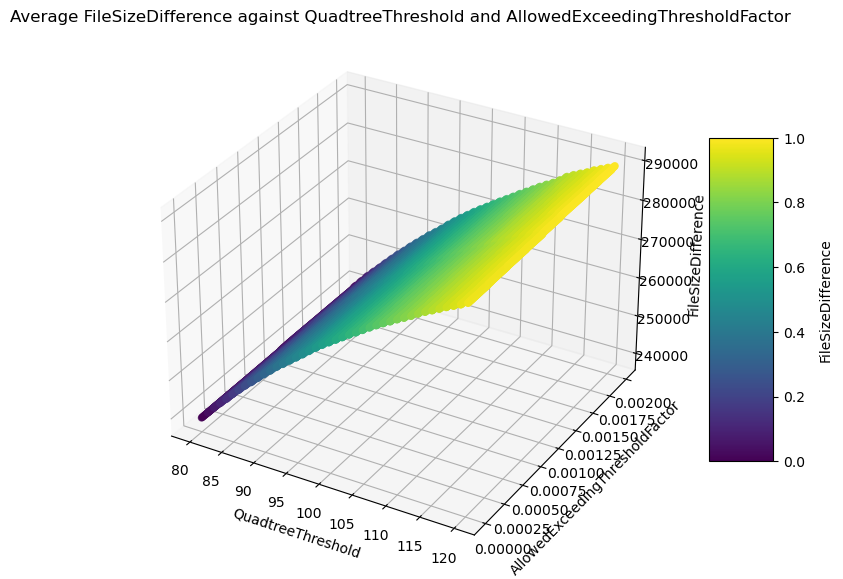

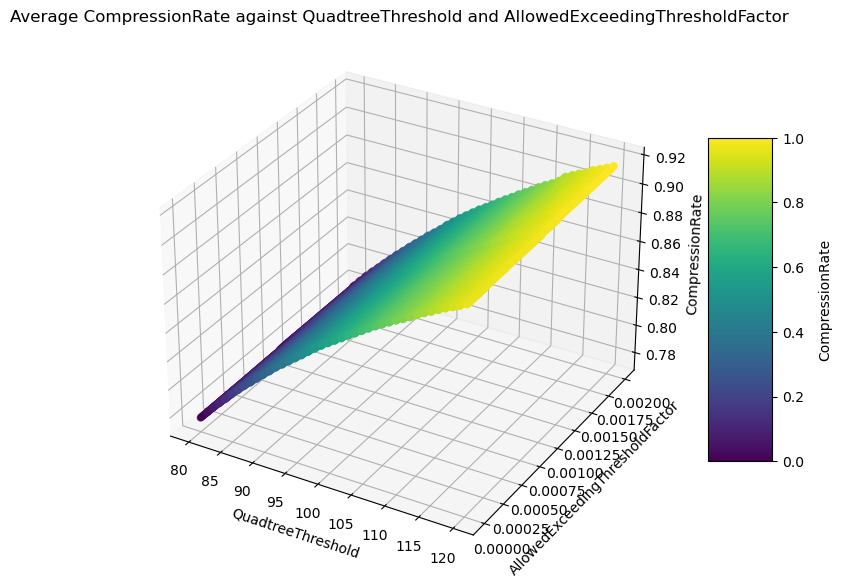

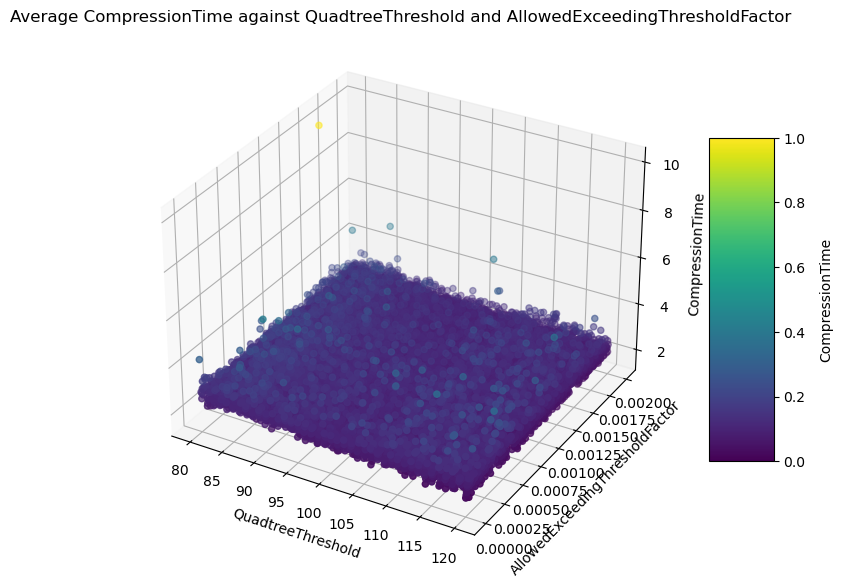

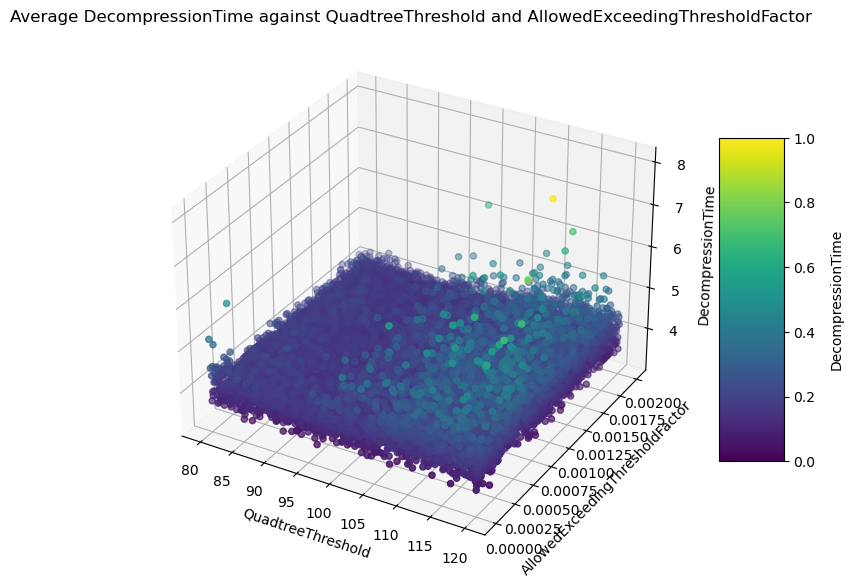

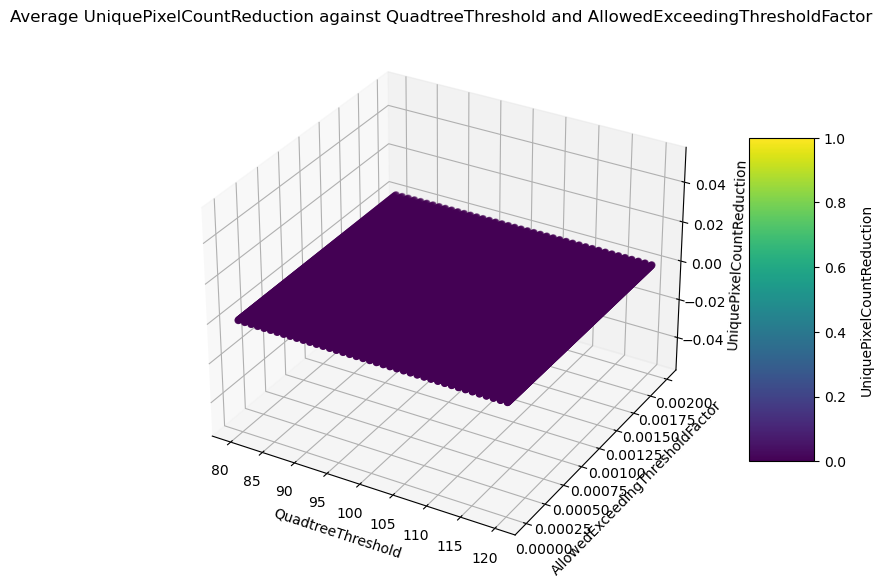

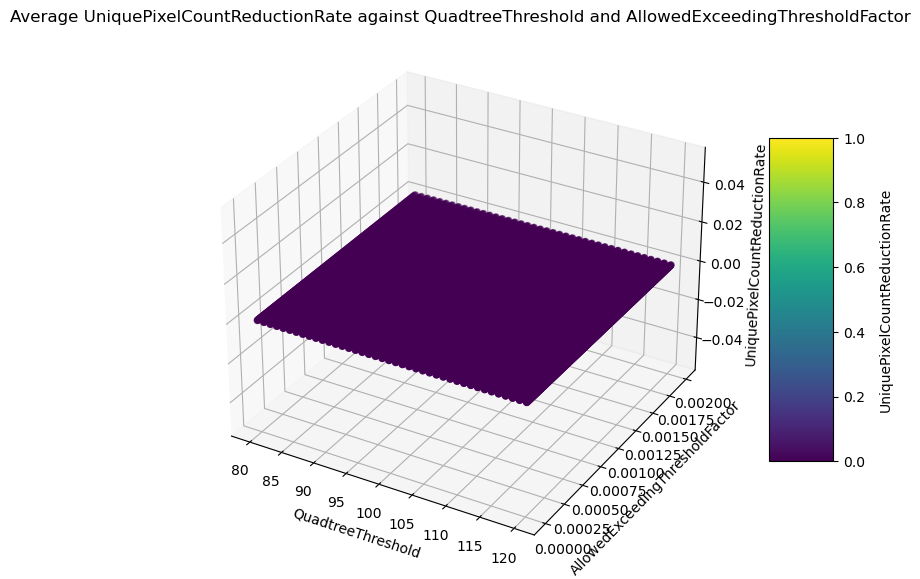

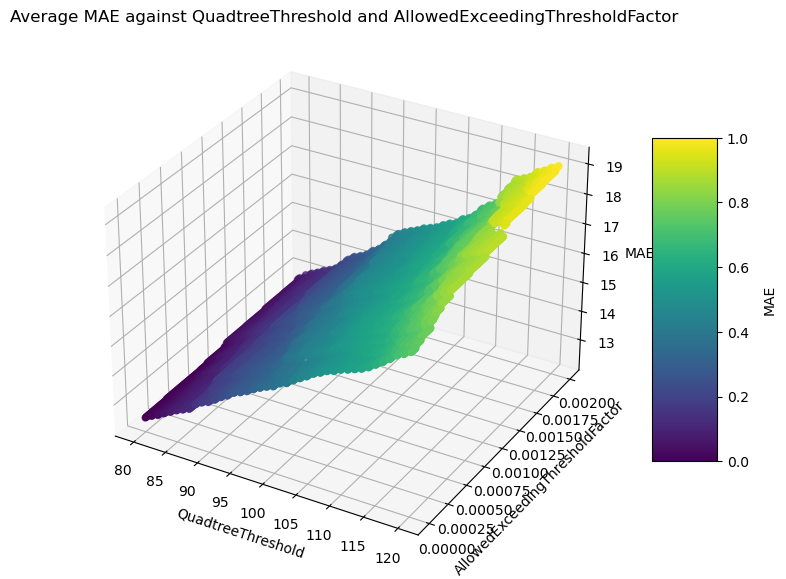

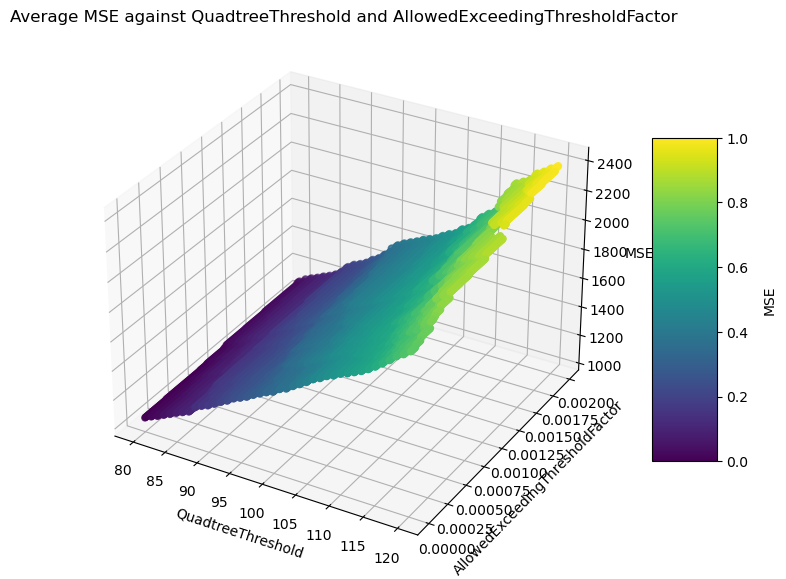

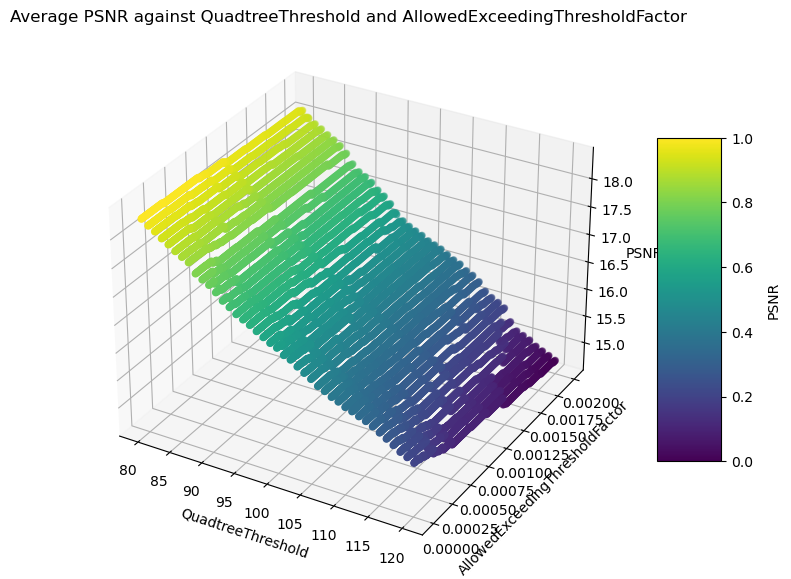

In [9]:
metrics = ['FileSizeDifference', 'CompressionRate', 'CompressionTime', 'DecompressionTime', 'UniquePixelCountReduction', 'UniquePixelCountReductionRate', 'MAE', 'MSE', 'PSNR']

for metric in metrics:
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    # Data for plotting
    x = data_grouped_by_test['QuadtreeThreshold']
    y = data_grouped_by_test['AllowedExceedingThresholdFactor']
    z = data_grouped_by_test[metric]
    
    # Using a colormap to represent Z values with colors
    norm = plt.Normalize(z.min(), z.max())
    colors = plt.cm.viridis(norm(z))
    sc = ax.scatter(x, y, z, c=colors)
    
    ax.set_xlabel('QuadtreeThreshold')
    ax.set_ylabel('AllowedExceedingThresholdFactor')
    ax.set_zlabel(metric)
    ax.set_title(f'Average {metric} against QuadtreeThreshold and AllowedExceedingThresholdFactor')
    
    # Adding a colorbar to the graph to indicate the scale
    cbar = fig.colorbar(sc, ax=ax, shrink=0.6, aspect=5)
    cbar.set_label(metric, labelpad=10)
    
    plt.show()


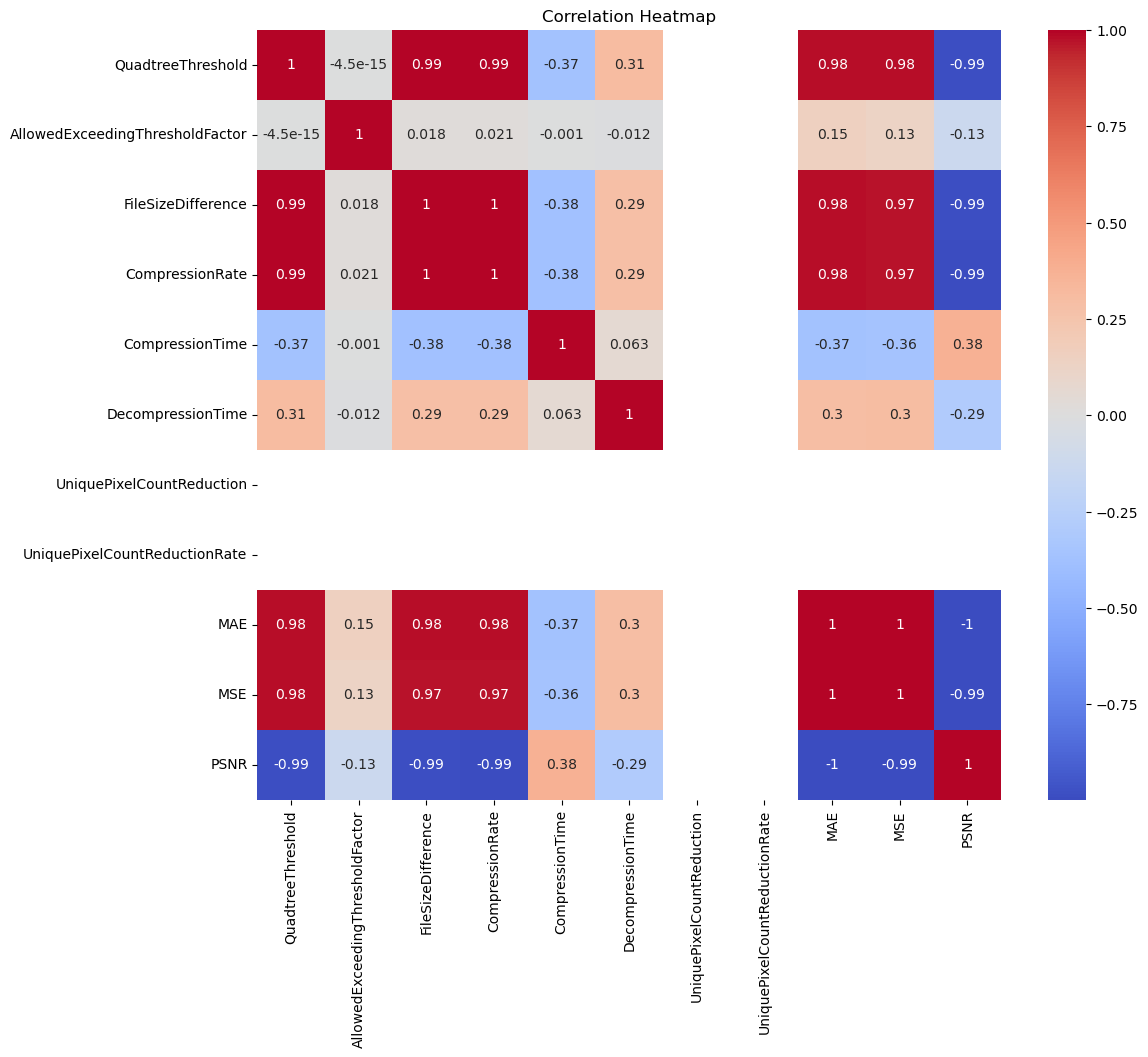

In [10]:
# Calculate the correlation matrix
correlation = data_grouped_by_test[['QuadtreeThreshold', 'AllowedExceedingThresholdFactor', 'FileSizeDifference', 'CompressionRate', 'CompressionTime', 'DecompressionTime', 'UniquePixelCountReduction', 'UniquePixelCountReductionRate', 'MAE', 'MSE', 'PSNR']].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

## Score and Evaluation

In [11]:
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# Normalize metrics
# data_grouped_by_test['CompressionRate'] = normalize(data_grouped_by_test['CompressionRate'])
data_grouped_by_test['CompressionTime'] = normalize(data_grouped_by_test['CompressionTime'])
data_grouped_by_test['DecompressionTime'] = normalize(data_grouped_by_test['DecompressionTime'])
data_grouped_by_test['MAE'] = normalize(data_grouped_by_test['MAE'])
data_grouped_by_test['MSE'] = normalize(data_grouped_by_test['MSE'])
data_grouped_by_test['PSNR'] = normalize(data_grouped_by_test['PSNR'])

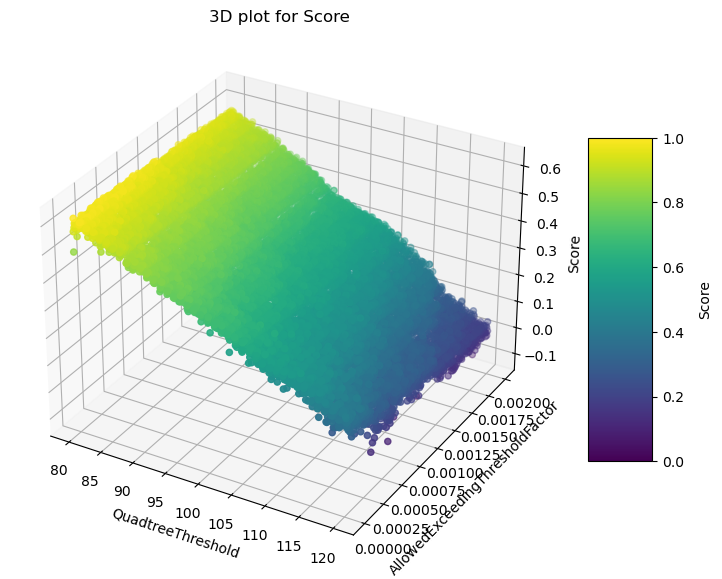

In [12]:
# Calculate LossScore
data_grouped_by_test['LossScore'] = -data_grouped_by_test['MAE'] - data_grouped_by_test['MSE'] + data_grouped_by_test['PSNR']

# Calculate the total score
data_grouped_by_test['Score'] = (5/9 * data_grouped_by_test['CompressionRate'] 
                         - 2/9 * (data_grouped_by_test['CompressionTime'] + data_grouped_by_test['DecompressionTime'])
                         + 2/9 * data_grouped_by_test['LossScore'])

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Data for plotting
x = data_grouped_by_test['QuadtreeThreshold']
y = data_grouped_by_test['AllowedExceedingThresholdFactor']
z = data_grouped_by_test['Score']

# Using a colormap to represent Z values (scores) with colors
norm = plt.Normalize(z.min(), z.max())
colors = plt.cm.viridis(norm(z))
sc = ax.scatter(x, y, z, c=colors)

ax.set_xlabel('QuadtreeThreshold')
ax.set_ylabel('AllowedExceedingThresholdFactor')
ax.set_zlabel('Score')
ax.set_title('3D plot for Score')

# Adding a colorbar to the graph
cbar = fig.colorbar(sc, ax=ax, shrink=0.6, aspect=5)
cbar.set_label('Score', labelpad=10)

plt.show()

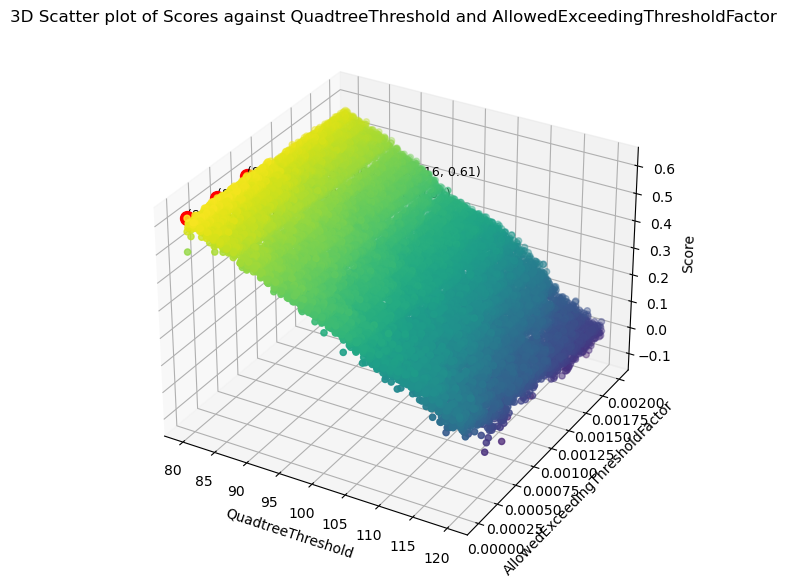

In [13]:
data_grouped_by_test = data_grouped_by_test.sort_values(by='Score', ascending=False)
top_3 = data_grouped_by_test.head(3)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for all data points
ax.scatter(data_grouped_by_test['QuadtreeThreshold'], data_grouped_by_test['AllowedExceedingThresholdFactor'], data_grouped_by_test['Score'], c=data_grouped_by_test['Score'], cmap='viridis')

# Highlighting and annotating top 3 scores
for index, row in top_3.iterrows():
    ax.scatter(row['QuadtreeThreshold'], row['AllowedExceedingThresholdFactor'], row['Score'], c='red', s=100)  # use larger size and red color
    label = '({}, {}, {:.2f})'.format(row['QuadtreeThreshold'], row['AllowedExceedingThresholdFactor'], row['Score'])
    ax.text(row['QuadtreeThreshold'], row['AllowedExceedingThresholdFactor'], row['Score'], label, fontsize=9)

ax.set_xlabel('QuadtreeThreshold')
ax.set_ylabel('AllowedExceedingThresholdFactor')
ax.set_zlabel('Score')
plt.title('3D Scatter plot of Scores against QuadtreeThreshold and AllowedExceedingThresholdFactor')
plt.show()

In [14]:
# Print out the top 3
print(top_3[['QuadtreeThreshold', 'AllowedExceedingThresholdFactor', 'Score']])


     QuadtreeThreshold  AllowedExceedingThresholdFactor     Score
2                   80                         0.000010  0.613684
143                 80                         0.000715  0.606315
72                  80                         0.000360  0.606154
